In [64]:
import pandas as pd
import numpy as np

data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Drop Columns

In [65]:
data.drop(['id'],axis=1,inplace = True) 

# drop bmi due to low correlation to stroke

# Visualization (Pre-modeling)

In [66]:
numeric_columns = data.select_dtypes(include=np.number)

numeric_columns_stroke = numeric_columns[numeric_columns['stroke'] == 1]
numeric_columns_nostroke = numeric_columns[numeric_columns['stroke'] == 0]

In [67]:
numeric_columns

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


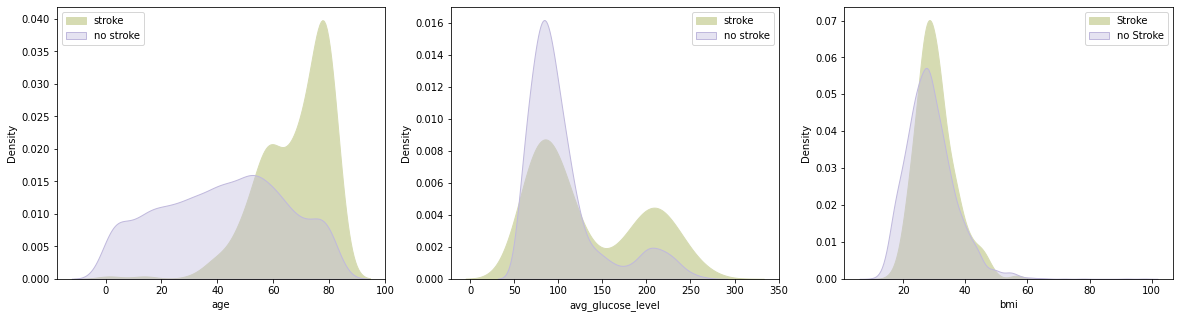

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

fig , ax =plt.subplots(ncols = 3, figsize=(20,5),facecolor='white')

sns.kdeplot(data=numeric_columns_stroke,x='age',ax=ax[0],shade=True,color='#D6DBB2',alpha=1, label = 'stroke',legend=True)
sns.kdeplot(data=numeric_columns_nostroke,x='age',ax=ax[0],shade=True,color='#C0B9DD',alpha=0.4, label = 'no stroke',legend=True)

sns.kdeplot(data=numeric_columns_stroke,x='avg_glucose_level',ax=ax[1],shade=True,color='#D6DBB2',alpha=1,  label = 'stroke',legend=True)
sns.kdeplot(data=numeric_columns_nostroke,x='avg_glucose_level',ax=ax[1],shade=True,color='#C0B9DD',alpha=0.4, label='no stroke',legend=True)

sns.kdeplot(data=numeric_columns_stroke,x='bmi',ax=ax[2],shade=True,color='#D6DBB2',alpha=1, label = 'Stroke',legend=True)
sns.kdeplot(data=numeric_columns_nostroke,x='bmi',ax=ax[2],shade=True,color='#C0B9DD',alpha=0.4, label = 'no Stroke',legend=True)

ax[0].legend(loc=2)
ax[1].legend()
ax[2].legend()
plt.show()

### Categorical Data

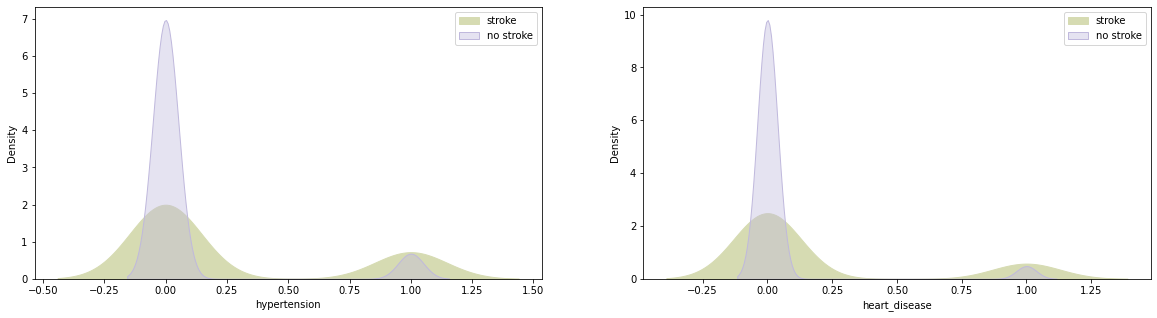

In [72]:
fig , ax =plt.subplots(ncols = 2, figsize=(20,5),facecolor='white')
sns.kdeplot(data=numeric_columns_stroke,x='hypertension', ax=ax[0],shade=True,alpha=1,color = '#D6DBB2', label = 'stroke',legend=True)
sns.kdeplot(data=numeric_columns_nostroke,x='hypertension', ax=ax[0],shade=True,color='#C0B9DD',alpha=0.4, label = 'no stroke',legend=True)

sns.kdeplot(data=numeric_columns_stroke,x='heart_disease',ax=ax[1],shade=True,color='#D6DBB2',alpha=1,  label = 'stroke',legend=True)
sns.kdeplot(data=numeric_columns_nostroke,x='heart_disease',ax=ax[1],shade=True,color='#C0B9DD',alpha=0.4, label='no stroke',legend=True)

ax[0].legend()
ax[1].legend()


### Drop BMI Column due to low correlation

In [7]:
data.drop(['bmi'],axis=1,inplace = True) 

# Handle Data Imbalance

In [8]:
print(f"Num of stroke data: {data[data['stroke']==1].count()[0]}")
print(f"Num of non-stroke data: {data[data['stroke']==0].count()[0]}")

Num of stroke data: 249
Num of non-stroke data: 4861


In [9]:
X = pd.get_dummies(data.drop('stroke',axis=1))
y = data['stroke']

In [10]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority')
X_sm, y_sm = sm.fit_resample(X, y)



1    4861
0    4861
Name: stroke, dtype: int64

# ML Model (Logistic Regression)

In [11]:
import sklearn.model_selection
# split dataset
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_sm, y_sm , test_size=0.25,train_size=0.75,random_state=0)

In [15]:
from sklearn import linear_model

reg = sklearn.linear_model.LogisticRegressionCV(random_state = 0,max_iter=10000)
reg.fit(X_train,y_train)
y_predicted = reg.predict(X_test)

In [26]:

from sklearn.metrics import confusion_matrix

c_m = confusion_matrix(y_test,y_predicted)
print(f'Confusion Matrix:\n\n {c_m}\n')
TP = c_m[0,0]
FP = c_m[0,1]
FN = c_m[1,0]
TN = c_m[1,1]
print(f'Accuracy: {(TP + TN) / (TP + TN + FP + FN)}')
print(f'Precision: {TP / (TP + FP)}')
print(f'Misclassification: {(FP + FN) / (TP + TN + FP + FN)}')
print(f'Specificity: {TN / (TN + FP)}')
print(f'Sensitivity: {TP / (TP + FN)}')

Confusion Matrix:

 [[1206   10]
 [ 106 1109]]

Accuracy: 0.9522830111065406
Precision: 0.9917763157894737
Misclassification: 0.04771698889345948
Specificity: 0.9910634495084897
Sensitivity: 0.9192073170731707


In [25]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test,y_predicted)

0.9073976076202079